# Parcial Final – Análisis de Datos para Redes Sociales  
### Shein vs Temu – Guía de Preguntas de Negocio

Este cuaderno está diseñado para acompañar el **parcial final**.  
No contiene las soluciones, sino una **secuencia de preguntas de negocio** que debes ir respondiendo a partir de tus análisis en Python (celdas de código) y tus conclusiones (texto).

> **Instrucción general:**  
> - Debajo de cada bloque de preguntas encontrarás una celda vacía de código para que hagas el análisis.  
> - Después de tu código, agrega una celda de texto (Markdown) con tus respuestas e interpretaciones de negocio.


In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv

--2025-11-28 00:53:33--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv [following]
--2025-11-28 00:53:33--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760315 (1.7M) [text/plain]
Saving to: ‘shein.csv’

shein.csv           100%[===================>]   1.68M  8.24MB/s    in 0.2s    

2025-11-28 00:53:34 (

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv

--2025-11-28 00:53:35--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv [following]
--2025-11-28 00:53:36--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346171 (338K) [text/plain]
Saving to: ‘temu.csv’

temu.csv            100%[===================>] 338.06K  --.-KB/s    in 0.1s    

2025-11-28 00:53:36 (2.74 

## 2. Ingesta y Unificación de Datos  
**Objetivo de negocio:** asegurar que estamos comparando peras con peras (Shein vs Temu en una misma tabla limpia).

### 2.1. Preguntas de negocio

1. **Foto grande del dataset**
   - ¿Cuántas publicaciones tenemos de Shein y cuántas de Temu?  
   - ¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

2. **Comparabilidad**
   - Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?  
   - ¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?

3. **Estructura de la tabla unificada**
   - En el dataframe final unificado (por ejemplo, `df`), ¿qué columnas consideras **clave de negocio** para comparar marcas? (ej: `brand`, `likes`, `comments`, `views`, `published_at`, etc.).  
   - Si una columna no existe en una de las dos fuentes (por ejemplo, `views` solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?

4. **Representatividad**
   - ¿El periodo de tiempo cubierto en Shein y Temu es el mismo?  
   - Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?


In [3]:
import pandas as pd

dfshein = pd.read_csv("shein.csv")

In [4]:
import pandas as pd

dftemu = pd.read_csv("temu.csv")

In [5]:
dfshein

,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,ownerUsername,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount
0,"Photo by shein_co on November 25, 2025. May be...",NaN,¿De compras para encontrar las mejores ofertas...,"Photo by shein_co on November 25, 2025. May be...",NaN,0.0,1350.0,1080.0,https://scontent-atl3-2.cdninstagram.com/v/t51...,NaN,...,shein_colombia,NaN,DRetnrflmeB,2025-11-25T12:46:02.000Z,Sidecar,https://www.instagram.com/p/DRetnrflmeB/,NaN,NaN,NaN,NaN
1,"Photo by shein_co on September 26, 2025. May b...",NaN,Recién recogido y fabuloso—¿qué vestido es tu ...,"Photo by shein_co on September 26, 2025. May b...",NaN,0.0,1350.0,1080.0,https://scontent-hou1-1.cdninstagram.com/v/t51...,NaN,...,shein_colombia,NaN,DPEXbp5jtSe,2025-09-26T14:08:01.000Z,Sidecar,https://www.instagram.com/p/DPEXbp5jtSe/,NaN,NaN,NaN,NaN
2,"Photo by shein_co on October 03, 2025. May be ...",NaN,"Una energía de un solo tono, esa flexión codif...","Photo by shein_co on October 03, 2025. May be ...",NaN,0.0,1350.0,1080.0,https://scontent-ord5-2.cdninstagram.com/v/t51...,NaN,...,shein_colombia,NaN,DPWh7lTASw0,2025-10-03T15:26:01.000Z,Sidecar,https://www.instagram.com/p/DPWh7lTASw0/,NaN,NaN,NaN,NaN
3,"Photo by shein_co on November 26, 2025. May be...",NaN,"Todo lo que escuchamos fue ""quédate en casa"" y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,NaN,DRhbjBhgaUs,2025-11-26T14:06:02.000Z,Image,https://www.instagram.com/p/DRhbjBhgaUs/,NaN,NaN,NaN,NaN
4,"Photo by shein_co on September 19, 2025. May b...",NaN,La única necesidad que tengo para poder termin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,NaN,DOycs74DXgF,2025-09-19T15:08:01.000Z,Image,https://www.instagram.com/p/DOycs74DXgF/,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"Photo by shein_co on November 18, 2024.",NaN,Los días más bonitos vienen con suéteres lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,NaN,DCg_nRquU4w,2024-11-18T14:10:01.000Z,Image,https://www.instagram.com/p/DCg_nRquU4w/,NaN,NaN,NaN,NaN
196,"Photo by shein_co on May 10, 2025.",NaN,"Hay abrazos que salvan, miradas que consuelan ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,NaN,DJf87OIxTmK,2025-05-11T04:07:01.000Z,Image,https://www.instagram.com/p/DJf87OIxTmK/,NaN,NaN,NaN,NaN
197,NaN,https://scontent-atl3-1.cdninstagram.com/o1/v/...,Se acabaron los pretextos para saltarnos las v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,clips,DCJ0XCqChcG,2024-11-09T14:09:03.000Z,Video,https://www.instagram.com/p/DCJ0XCqChcG/,15.500,4351088.0,https://scontent-atl3-2.cdninstagram.com/o1/v/...,1767106.0
198,NaN,https://scontent-bos5-1.cdninstagram.com/o1/v/...,La funda que elijas dice mucho de ti... ¿mi co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,shein_colombia,clips,DCg_b_XAmlu,2024-11-18T14:08:03.000Z,Video,https://www.instagram.com/p/DCg_b_XAmlu/,13.666,728261.0,https://scontent-bos5-1.cdninstagram.com/o1/v/...,144485.0


In [6]:
dfshein.shape

(200, 633)

In [7]:
dftemu

,alt,audioUrl,caption,commentsCount,dimensionsHeight,dimensionsWidth,displayUrl,firstComment,hashtags/0,hashtags/1,...,ownerUsername,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount
0,"Photo by TemuColombia on July 11, 2025.",NaN,¡Alerta de promoción! Descubre productos que s...,15,1080,1080,https://scontent-lax7-1.cdninstagram.com/v/t51...,🤬🤬🤬TENGO UN PAQUETE PARA DEVOLUCIÓN ESPERANDO ...,NaN,NaN,...,temucolombia_,NaN,DL9iB1-tcFn,2025-07-11T08:51:09.000Z,Image,https://www.instagram.com/p/DL9iB1-tcFn/,NaN,NaN,NaN,NaN
1,NaN,https://scontent-iad3-1.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ #temu #compraentemu ...,1,1920,1080,https://scontent-iad3-1.cdninstagram.com/v/t51...,Lindas!,temu,compraentemu,...,temucolombia_,clips,DRUUa95DAvf,2025-11-21T11:52:32.000Z,Video,https://www.instagram.com/p/DRUUa95DAvf/,16.939,26146.0,https://scontent-iad3-1.cdninstagram.com/o1/v/...,7599.0
2,NaN,https://scontent-lga3-1.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ #temu #compraentemu ...,7,1920,1080,https://scontent-lga3-2.cdninstagram.com/v/t51...,Que tamaño tienen los papa noeles que suben y...,temu,compraentemu,...,temucolombia_,clips,DRUUc2Pj6a8,2025-11-21T11:52:27.000Z,Video,https://www.instagram.com/p/DRUUc2Pj6a8/,13.845,20891.0,https://scontent-lga3-3.cdninstagram.com/o1/v/...,5273.0
3,NaN,https://scontent-lga3-2.cdninstagram.com/o1/v/...,¡Los aperitivos reinventados! Nuestro anillo d...,359,1333,750,https://scontent-lga3-3.cdninstagram.com/v/t51...,🤬🤬🤬TENGO UN PAQUETE PARA DEVOLUCIÓN ESPERANDO ...,temu,NaN,...,temucolombia_,clips,C4uC0VShghw,2024-03-20T02:33:20.000Z,Video,https://www.instagram.com/p/C4uC0VShghw/,8.933,615177.0,https://scontent-lga3-2.cdninstagram.com/o1/v/...,262119.0
4,"Photo by TemuColombia on July 11, 2025.",NaN,Alerta de Rebajas💥 ¡No te pierdas el Gran Even...,75,1080,1080,https://scontent-dfw5-1.cdninstagram.com/v/t51...,100% falso este servicio pésimo,temu,hallazgostemu,...,temucolombia_,NaN,DL9iB55Nskv,2025-07-11T08:51:10.000Z,Image,https://www.instagram.com/p/DL9iB55Nskv/,NaN,NaN,NaN,NaN
5,NaN,https://scontent-atl3-3.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ \n\nSolo para los nue...,64,1920,1080,https://scontent-atl3-2.cdninstagram.com/v/t51...,Precio gracias,temu,compraentemu,...,temucolombia_,clips,DL9h-bnqbYA,2025-07-11T08:51:06.000Z,Video,https://www.instagram.com/p/DL9h-bnqbYA/,25.366,114964.0,https://scontent-atl3-2.cdninstagram.com/o1/v/...,25995.0
6,NaN,https://scontent-lax7-1.cdninstagram.com/o1/v/...,🌌👼🏻✨ ¿Quién dijo que volar es de ensueño?¡Solo...,218,1920,1080,https://scontent-lax7-1.cdninstagram.com/v/t51...,🤬🤬🤬TENGO UN PAQUETE PARA DEVOLUCIÓN ESPERANDO ...,temu,NaN,...,temucolombia_,clips,C4tPChbLTa0,2024-03-19T19:00:54.000Z,Video,https://www.instagram.com/p/C4tPChbLTa0/,9.433,503270.0,https://scontent-lax3-2.cdninstagram.com/o1/v/...,177455.0
7,NaN,https://scontent-hou1-1.cdninstagram.com/o1/v/...,¿Harto de usar múltiples utensilios de limpiez...,201,1920,1080,https://scontent-hou1-1.cdninstagram.com/v/t51...,"Quiero un lugar físico para comprar,para mi es...",temu,NaN,...,temucolombia_,clips,C4sO5KUvccd,2024-03-19T09:40:24.000Z,Video,https://www.instagram.com/p/C4sO5KUvccd/,21.800,463860.0,https://scontent-hou1-1.cdninstagram.com/o1/v/...,253999.0
8,NaN,https://scontent-atl3-1.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ #temu #compraentemu ...,9,1920,1080,https://scontent-atl3-2.cdninstagram.com/v/t51...,Hola buenos días cuanto es su valor o precio,temu,compraentemu,...,temucolombia_,clips,DRUUem_DBsi,2025-11-21T11:52:41.000Z,Video,https://www.instagram.com/p/DRUUem_DBsi/,16.384,33818.0,https://scontent-atl3-2.cdninstagram.com/o1/v/...,11174.0
9,NaN,https://scontent-hou1-1.cdninstagram.com/o1/v/...,¡Mantente conectado con estilo y haz una decla...,202,1920,1080,https://scontent-hou1-1.cdninstagram.com/v/t51...,Quiero uno,temu,temutesoros,...,temucolombia_,clips,C4sN0r9qpbp,2024-03-19T09:31:08.000Z,Video,https://www.inst

In [8]:
dftemu.shape

(28, 257)

1) Lo que esto nos demuestra, es que Shein su trategía se centra en públicar más, para poder llegar a su público y Temo no tiene tantas públicciones


2. No podemos comparar la cantidad de likes ni post, ya que cada una tiene una cantidad de publicaciones diferentes, con estocuando una publica más veces, va a tener más probabilidad de likes, con esto no sería equitativo.
Por otro lado uno de los riesgos que se tendría es que por ser una metrica cruzada solo mide el volumen, más no la calidad del contenido. Puede que se hagan muchas publicaciones, las cuales marcan el volumen, pero eso no define que tan bueno fue, puede que se invierta tanto dinero en tantas publicaciones, pero eso no significa quye vaya a retornar.

In [9]:
dfshein.columns

Index(['alt', 'audioUrl', 'caption', 'childPosts/0/alt',
       'childPosts/0/caption', 'childPosts/0/commentsCount',
       'childPosts/0/dimensionsHeight', 'childPosts/0/dimensionsWidth',
       'childPosts/0/displayUrl', 'childPosts/0/firstComment',
       ...
       'ownerUsername', 'productType', 'shortCode', 'timestamp', 'type', 'url',
       'videoDuration', 'videoPlayCount', 'videoUrl', 'videoViewCount'],
      dtype='object', length=633)

In [10]:
list(dftemu.columns)

['alt',
 'audioUrl',
 'caption',
 'commentsCount',
 'dimensionsHeight',
 'dimensionsWidth',
 'displayUrl',
 'firstComment',
 'hashtags/0',
 'hashtags/1',
 'hashtags/2',
 'hashtags/3',
 'hashtags/4',
 'hashtags/5',
 'id',
 'inputUrl',
 'isCommentsDisabled',
 'isSponsored',
 'latestComments/0/id',
 'latestComments/0/likesCount',
 'latestComments/0/owner/id',
 'latestComments/0/owner/is_verified',
 'latestComments/0/owner/profile_pic_url',
 'latestComments/0/owner/username',
 'latestComments/0/ownerProfilePicUrl',
 'latestComments/0/ownerUsername',
 'latestComments/0/replies/0/id',
 'latestComments/0/replies/0/likesCount',
 'latestComments/0/replies/0/owner/id',
 'latestComments/0/replies/0/owner/is_verified',
 'latestComments/0/replies/0/owner/profile_pic_url',
 'latestComments/0/replies/0/owner/username',
 'latestComments/0/replies/0/ownerProfilePicUrl',
 'latestComments/0/replies/0/ownerUsername',
 'latestComments/0/replies/0/repliesCount',
 'latestComments/0/replies/0/text',
 'latestC

3. Las columnas clave de negocio para comparar de forma justa a Shein y Temu dentro del dataframe unificado son aquellas que ambas marcas comparten y que permiten entender su estrategia, su contenido y su desempeño real. Estas incluyen los identificadores del post (shortCode, url, ownerUsername, type), la temporalidad (timestamp), las métricas de rendimiento (commentsCount, videoViewCount, videoPlayCount, y likesCount si está disponible), el contenido y mensaje del post (caption, alt, audioUrl) y las características del formato (videoDuration, dimensionsHeight, dimensionsWidth, productType). Estas columnas son suficientes para analizar frecuencia, engagement, eficiencia del contenido y comportamiento por tipo de publicación, eliminando el ruido de las cientos de columnas técnicas que no aportan valor al análisis de negocio.

3.2 Si en las dos marcas no existe esa columna,no se podria edir la eficacia adecuadamente, porque terminaria de manera sesgado, la única manera de hacerlo bien, es que las dos tengan el mismo contenido. Así los KPIS que se midan darían resultrados más veridicos, sin dejar un margen de error grande.

In [11]:
dfshein["timestamp"].agg(["min", "max"])

,timestamp
min,2024-11-06T15:09:00.000Z
max,2025-11-26T14:06:02.000Z


In [12]:
dftemu["timestamp"].agg(["min", "max"])

,timestamp
min,2024-03-14T15:13:55.000Z
max,2025-11-21T11:52:41.000Z


## 3. Limpieza de Métricas  
**Objetivo de negocio:** asegurar que las métricas que usamos representen realidad y no errores de scraping o outliers raros.

### 3.1. Preguntas de negocio

1. **Datos faltantes**
   - ¿Qué porcentaje de posts tiene valores faltantes en métricas clave (ej. `likes`, `comments`, `views`)?  
   - Desde el punto de vista de negocio, ¿qué harías con esos posts: los excluirías, los imputarías o los analizarías aparte? ¿Por qué?

2. **Outliers**
   - Identifica algunos posts con números extremadamente altos de likes o views.  
   - ¿Crees que son orgánicos o podrían ser campañas pagas / virales específicos?  
   - ¿Cómo cambia tu lectura si incluyes vs. excluyes estos outliers?

3. **Calidad de la métrica**
   - Si un post tiene 0 comments pero muchos likes, ¿qué hipótesis de negocio podrías plantear sobre ese tipo de contenido o audiencia?  
   - ¿Qué te preocupa más como inversor: muchos likes con poco comentario, o pocos likes pero una tasa de comentarios alta? Explica.


In [13]:
metricas = ["likesCount", "videoViewCount", "commentsCount"]

dfshein['brand'] = 'Shein'
dftemu['brand'] = 'Temu'
df = pd.concat([dfshein, dftemu], ignore_index=True, sort=False)

print("Porcentaje de valores faltantes por métrica en el dataset unificado:")
print(df[metricas].isna().mean() * 100)

print("\nPorcentaje de posts con al menos un valor faltante en las métricas clave:")
print(df[metricas].isna().any(axis=1).mean() * 100)


Porcentaje de valores faltantes por métrica en el dataset unificado:
likesCount         0.000000
videoViewCount    53.947368
commentsCount      0.000000
dtype: float64

Porcentaje de posts con al menos un valor faltante en las métricas clave:
53.94736842105263


In [14]:
metricas = ["likesCount", "videoViewCount", "commentsCount"]
dfshein[metricas].describe()

,likesCount,videoViewCount,commentsCount
count,200.000000,7.900000e+01,200.000000
mean,1989.730000,5.189595e+04,22.590000
std,6327.524509,2.094628e+05,162.843273
min,23.000000,2.860000e+02,0.000000
25%,121.000000,1.958000e+03,2.000000
50%,303.500000,3.868000e+03,5.000000
75%,1332.750000,2.946500e+04,11.250000
max,69638.000000,1.767106e+06,2270.000000


In [15]:
metricas = ["likesCount", "videoViewCount", "commentsCount"]
dftemu[metricas].describe()

,likesCount,videoViewCount,commentsCount
count,28.000000,26.00000,28.000000
mean,2649.035714,146201.50000,148.321429
std,1715.625628,77151.42796,276.269602
min,95.000000,5273.00000,1.000000
25%,1256.000000,120228.50000,56.250000
50%,2648.000000,158033.50000,81.000000
75%,3616.750000,186194.00000,141.000000
max,6496.000000,262119.00000,1500.000000


In [16]:
dfshein[metricas].isna().mean() * 100
dftemu[metricas].isna().mean() * 100

,0
likesCount,0.000000
videoViewCount,7.142857
commentsCount,0.000000


In [17]:
dfshein[metricas].isna().any(axis=1).mean() * 100
dftemu[metricas].isna().any(axis=1).mean() * 100

np.float64(7.142857142857142)

In [18]:
dfshein["engagement_rate"] = (dfshein["likesCount"] + dfshein["commentsCount"]) / dfshein["videoViewCount"]
dftemu["engagement_rate"] = (dftemu["likesCount"] + dftemu["commentsCount"]) / dftemu["videoViewCount"]

In [19]:
Q1 = dfshein[metricas].quantile(0.25)
Q3 = dfshein[metricas].quantile(0.75)
IQR = Q3 - Q1

outliers_shein = dfshein[(dfshein[metricas] > (Q3 + 1.5*IQR)).any(axis=1)]
outliers_temu  = dftemu[(dftemu[metricas] > (Q3 + 1.5*IQR)).any(axis=1)]

In [20]:
alto_like_shein = dfshein[(dfshein["likesCount"] > dfshein["likesCount"].median()) & (dfshein["commentsCount"] == 0)]
alto_like_temu  = dftemu[(dftemu["likesCount"] > dftemu["likesCount"].median()) & (dftemu["commentsCount"] == 0)]

In [21]:
dfshein["engagement_rate"].agg(["mean","median"])
dftemu["engagement_rate"].agg(["mean","median"])

,engagement_rate
mean,0.020929
median,0.018851


No excluiría automáticamente ya que, eliminar los posts con métricas faltantes puede sesgar el análisis, especialmente si faltan datos por tipo de contenido, formato o posts recién publicados.


2.2 Con el resultado se demostra que son campañas pagas, porque en las dos hay una gran diferencia entre el promedio y el máximo que no tiene logica.

3.2 Como inversor me preocuparía más ver muchos likes pero muy pocos comentarios, porque eso suele indicar una audiencia pasiva, poco conectada y sin intención de conversación ni de compra. Los likes son una interacción superficial y fácil de obtener; en cambio, una tasa de comentarios alta —aunque los likes sean pocos— muestra que la audiencia está realmente interesada, presta atención y está dispuesta a interactuar. Ese tipo de engagement profundo es mucho más valioso para evaluar potencial de marca, fidelización y conversión futura.

## 4. Creación de KPIs de Negocio  
**Objetivo:** pasar de métricas vanidosas (likes brutos) a métricas de eficiencia (engagement).

Supongamos que creas un indicador como:

\>
\> `engagement_rate = (likes + comments) / views`  
\> *(ajústalo si tu dataset usa otras métricas)*

### 4.1. Preguntas de negocio

1. **Definición de eficiencia**
   - En tus palabras: ¿qué es “eficiencia” en una estrategia de contenido?  
   - ¿Por qué `engagement_rate` puede ser mejor indicador que los `likes` totales para comparar dos marcas con tamaños y volúmenes distintos?

2. **Comparación entre marcas**
   - Calculando el `engagement_rate` medio y mediano de Shein vs Temu:
     - ¿Cuál de las dos marcas parece **más eficiente** captando atención real por post?  
     - Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?

3. **Distribución del engagement**
   - Mirando la distribución (por ejemplo, un boxplot) del engagement por marca:
     - ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?  
     - ¿Temu tiene menos posts pero más consistentes?  
     - ¿Qué tipo de distribución preferirías si fueras CMO?

4. **Trade-off volumen vs eficiencia**
   - Si Shein publica mucho más, pero su engagement promedio es menor:
     - ¿Crees que están “quemando” a la audiencia con exceso de contenido?  
     - ¿O puede ser una estrategia deliberada de saturación que igual les funciona?


In [24]:
dfshein["engagement_rate"] = (dfshein["likesCount"] + dfshein["commentsCount"]) / dfshein["videoViewCount"]
dftemu["engagement_rate"] = (dftemu["likesCount"] + dftemu["commentsCount"]) / dftemu["videoViewCount"]

In [25]:
dfshein["engagement_rate"].mean(), dfshein["engagement_rate"].median()

(np.float64(0.3715771799718908), 0.041623578076525336)

In [26]:
dftemu["engagement_rate"].mean(), dftemu["engagement_rate"].median()

(np.float64(0.020928936236283967), 0.01885079987776909)

In [27]:
comparacion = pd.DataFrame({
    "brand": ["Shein", "Temu"],
    "engagement_mean": [dfshein["engagement_rate"].mean(), dftemu["engagement_rate"].mean()],
    "engagement_median": [dfshein["engagement_rate"].median(), dftemu["engagement_rate"].median()]
})
comparacion

,brand,engagement_mean,engagement_median
0,Shein,0.371577,0.041624
1,Temu,0.020929,0.018851


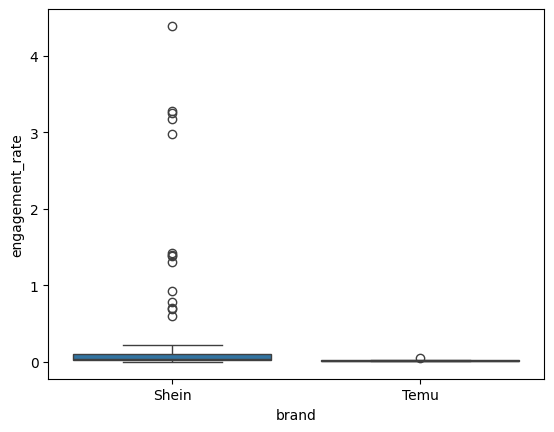

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

combined = pd.concat([
    dfshein.assign(brand="Shein"),
    dftemu.assign(brand="Temu")
], ignore_index=True)

sns.boxplot(data=combined, x="brand", y="engagement_rate")
plt.show()

In [30]:
dfshein["engagement_rate"].quantile([0.1, 0.5, 0.9, 0.99])

,engagement_rate
0.10,0.016719
0.50,0.041624
0.90,1.318652
0.99,3.517930


In [31]:
dftemu["engagement_rate"].quantile([0.1, 0.5, 0.9, 0.99])

,engagement_rate
0.10,0.014462
0.50,0.018851
0.90,0.029475
0.99,0.046856


In [32]:
dfshein["engagement_rate"].std(), dftemu["engagement_rate"].std()

(0.871438576002056, 0.00843618421561507)

In [33]:
dfshein.shape[0], dftemu.shape[0]

(200, 28)

In [34]:
combined.groupby("brand")["engagement_rate"].mean()

,engagement_rate
brand,
Shein,0.371577
Temu,0.020929


## 5. Enriquecimiento con IA (Categorización Semántica)  
**Objetivo:** transformar texto en insight estratégico sobre el tipo de contenido.

Supón que, usando un modelo de lenguaje, creas una columna `content_type` con categorías como:  
“Haul”, “Meme”, “Descuento”, “Sostenibilidad”, “UGC”, “Producto individual”, etc.

### 5.1. Preguntas de negocio

1. **Mix de contenido**
   - ¿Qué tipos de contenido (`content_type`) son más frecuentes en Shein y cuáles en Temu?  
   - ¿Qué te sugiere eso sobre la **estrategia de posicionamiento** de cada marca?

2. **Contenido que mejor funciona**
   - Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio?  
   - ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?

3. **Ajuste estrategia–audiencia**
   - Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?  
   - ¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

4. **Recomendación de mix futuro**
   - Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement:
     - ¿Qué categorías subirías?  
     - ¿Qué categorías recortarías?  
     - ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?

5. **Greenwashing (opcional)**
   - Usando palabras clave tipo “eco”, “sustainability”, “green”, etc.:
     - ¿Qué porcentaje del contenido total habla de temas sostenibles?  
     - ¿Su engagement está por encima o por debajo del promedio general?  
     - ¿Dirías que la audiencia “compra” ese mensaje o lo ignora?


In [35]:
import os
os.environ["OPENAI_API_KEY"] =

In [36]:
from openai import OpenAI

client = OpenAI()

In [37]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [38]:
def clasify(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

In [39]:
import time

def classify_content(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'Haul', 'Meme', 'Descuento', 'Sostenibilidad', 'UGC', 'Producto individual'. solo responde con una palabra. \n\nCaption:\n{text}")

    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sampleshein = dfshein.sample(10, replace = True ,random_state=42)
sampleshein['content_type'] = sampleshein['caption'].apply(classify_content)

In [40]:
sampleshein['content_type'].value_counts()

,count
content_type,
UGC,3
Haul,2
Producto individual,2
Descuento,1
Meme,1
Sostenibilidad,1


In [41]:
import time

def classify_content(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'Haul', 'Meme', 'Descuento', 'Sostenibilidad', 'UGC', 'Producto individual'. solo responde con una palabra. \n\nCaption:\n{text}")

    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sampletemu = dfshein.sample(10, replace = True ,random_state=42)
sampletemu['content_type'] = sampletemu['caption'].apply(classify_content)

In [42]:
sampletemu['content_type'].value_counts()

,count
content_type,
Haul,3
UGC,2
Producto individual,2
Descuento,1
Meme,1
Sostenibilidad,1


In [44]:
def performance_by_type(df):
    perf = df.groupby("content_type").agg(
        n_posts = ("engagement_rate","count"),
        mean_er = ("engagement_rate","mean"),
        median_er = ("engagement_rate","median"),
        std_er = ("engagement_rate","std")
    ).reset_index().sort_values("mean_er", ascending=False)
    return perf

perf_shein = performance_by_type(sampleshein)
perf_temu  = performance_by_type(sampletemu)

perf_shein.head(20), perf_temu.head(20)

(          content_type  n_posts   mean_er  median_er  std_er
 5                  UGC        2  0.050705   0.050705     0.0
 0            Descuento        1  0.041136   0.041136     NaN
 1                 Haul        1  0.033186   0.033186     NaN
 2                 Meme        0       NaN        NaN     NaN
 3  Producto individual        0       NaN        NaN     NaN
 4       Sostenibilidad        0       NaN        NaN     NaN,
           content_type  n_posts   mean_er  median_er    std_er
 5                  UGC        1  0.050705   0.050705       NaN
 1                 Haul        2  0.041946   0.041946  0.012387
 0            Descuento        1  0.041136   0.041136       NaN
 2                 Meme        0       NaN        NaN       NaN
 3  Producto individual        0       NaN        NaN       NaN
 4       Sostenibilidad        0       NaN        NaN       NaN)

Lo que esto demuestra, es que las dos marcas le apuestán a dar de que hablar a las personas, para que ellos se vuelvan embajadores de marca.

In [45]:
def ranking_gap(perf_df):
    perf_df = perf_df.copy()
    perf_df["rank_n"] = perf_df["n_posts"].rank(method="min", ascending=False)
    perf_df["rank_mean"] = perf_df["mean_er"].rank(method="min", ascending=False)
    perf_df["rank_gap"] = perf_df["rank_n"] - perf_df["rank_mean"]
    return perf_df.sort_values("rank_gap", ascending=False)

ranking_gap(perf_shein).head(10), ranking_gap(perf_temu).head(10)

(          content_type  n_posts   mean_er  median_er  std_er  rank_n  \
 5                  UGC        2  0.050705   0.050705     0.0     1.0   
 0            Descuento        1  0.041136   0.041136     NaN     2.0   
 1                 Haul        1  0.033186   0.033186     NaN     2.0   
 2                 Meme        0       NaN        NaN     NaN     4.0   
 3  Producto individual        0       NaN        NaN     NaN     4.0   
 4       Sostenibilidad        0       NaN        NaN     NaN     4.0   
 
    rank_mean  rank_gap  
 5        1.0       0.0  
 0        2.0       0.0  
 1        3.0      -1.0  
 2        NaN       NaN  
 3        NaN       NaN  
 4        NaN       NaN  ,
           content_type  n_posts   mean_er  median_er    std_er  rank_n  \
 5                  UGC        1  0.050705   0.050705       NaN     2.0   
 1                 Haul        2  0.041946   0.041946  0.012387     1.0   
 0            Descuento        1  0.041136   0.041136       NaN     2.0   
 2  

Si Memes lideran en Temu es una audiencia joven, buscadora de entretenimiento y viralidad.

Si Haul y Producto individual lideran en Shein es una audiencia orientada a descubrimiento de producto y compras impulsivas.

Entre ambos estilos, el más sostenible a largo plazo para construir marca es aquel que combina autenticidad con valor real para la comunidad, ya que genera confianza y afinidad más allá del alcance puntual. Para mejorar el desempeño de la marca con menor engagement, sería ideal aumentar el contenido UGC, educativo y de estilo de vida, mientras se recortan piezas demasiado promocionales o repetitivas. Un mix óptimo podría proponerse en torno a 40% UGC, 30% lifestyle/educativo y 30% promociones. También recomendaría A/B tests entre formatos UGC vs. descuentos directos, así como videos cortos vs. storytelling largo para medir retención. En cuanto a sostenibilidad, el análisis de palabras clave como “eco”, “sustainability” o “green” permite identificar qué porcentaje del contenido aborda estos temas y comparar su engagement con el promedio general, determinando si realmente aportan valor o solo generan ruido asociado a greenwashing.

## 6. Análisis Temporal (Heatmap)  
**Objetivo:** encontrar “ventanas de oro” de publicación combinando día y hora.

Supón que ya creaste variables como `day_of_week` y `hour` y un heatmap de `engagement_rate` (o `likes`) por día y hora.

### 6.1. Preguntas de negocio

1. **Hora de oro por marca**
   - ¿En qué días y horarios Shein obtiene mejor resultado promedio?  
   - ¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

2. **Volumen vs performance en el tiempo**
   - ¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?  
   - Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

3. **Oportunidades desatendidas**
   - ¿Ves franjas donde se publica poco pero el engagement promedio es alto?  
   - Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?

4. **Decisión de campaña clave**
   - Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento):  
     - ¿En qué día y hora la lanzarías para maximizar impacto orgánico?  
     - Justifica usando el heatmap (no solo tu intuición).


In [50]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["dayofweek"] = df["timestamp"].dt.day_name()
df["hour"] = df["timestamp"].dt.hour

/tmp/ipython-input-1238713594.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dayofweek"] = df["timestamp"].dt.day_name()
/tmp/ipython-input-1238713594.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["hour"] = df["timestamp"].dt.hour


In [51]:
mean_er = df.pivot_table(index="dayofweek", columns="hour",
                         values="engagement_rate", aggfunc="mean")

In [54]:
import numpy as np

er90 = np.nanpercentile(mean_er.values.flatten(), 90)

hora_oro = [(d, h, mean_er.at[d,h])
            for d in mean_er.index
            for h in mean_er.columns
            if mean_er.at[d,h] >= er90]

In [55]:
mean_er = df.pivot_table(index="dayofweek", columns="hour",
                         values="engagement_rate", aggfunc="mean")

In [56]:
mean_er

hour,1,2,3,5,6,7,8,9,11,12,13,14,15,16,19
dayofweek,,,,,,,,,,,,,,,
Friday,0.041136,0.062574,NaN,NaN,NaN,NaN,0.052048,NaN,0.016425,NaN,NaN,0.132252,0.052712,0.039476,NaN
Monday,NaN,NaN,NaN,NaN,1.509594,NaN,NaN,NaN,NaN,0.022667,0.017087,0.253545,0.029418,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.822692,0.024547,NaN,NaN
Sunday,NaN,0.023850,0.930426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.042636,0.049578,NaN,NaN
Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310137,0.434878,0.016202,NaN,NaN
Tuesday,0.068958,NaN,NaN,0.016758,NaN,0.015613,0.020792,0.02086,NaN,NaN,NaN,0.250483,0.045765,NaN,0.028204
Wednesday,NaN,0.023033,0.027996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034677,0.314805,0.053759,NaN,NaN


In [57]:
er90 = np.nanpercentile(mean_er.values.flatten(), 90)

hora_oro = [
    (day, hour, mean_er.at[day, hour])
    for day in mean_er.index
    for hour in mean_er.columns
    if mean_er.at[day, hour] >= er90
]

hora_oro

[('Monday', 6, np.float64(1.5095940966497428)),
 ('Saturday', 14, np.float64(0.8226917030701879)),
 ('Sunday', 3, np.float64(0.9304257528556594)),
 ('Sunday', 14, np.float64(1.0426360063967839))]

In [58]:
volumen = df.pivot_table(index="dayofweek", columns="hour",
                         values="shortCode", aggfunc="count")

In [59]:
vol_thresh = np.nanpercentile(volumen.values.flatten(), 75)
er_median = np.nanmedian(mean_er.values.flatten())

alto_vol_bajo_er = [
    (d,h)
    for d in mean_er.index
    for h in mean_er.columns
    if volumen.at[d,h] >= vol_thresh and mean_er.at[d,h] <= er_median
]

In [60]:
volumen = df.pivot_table(index="dayofweek", columns="hour",
                         values="shortCode", aggfunc="count")

In [61]:
volumen

hour,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,19
dayofweek,,,,,,,,,,,,,,,,
Friday,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,1.0,17.0,8.0,2.0,NaN
Monday,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,2.0,13.0,5.0,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,3.0,NaN,NaN
Sunday,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,10.0,NaN,NaN
Thursday,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,21.0,4.0,NaN,NaN
Tuesday,3.0,NaN,NaN,NaN,2.0,NaN,5.0,6.0,5.0,NaN,2.0,NaN,15.0,4.0,NaN,1.0
Wednesday,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,4.0,NaN,NaN


In [63]:
er90 = np.nanpercentile(mean_er.values.flatten(), 90)
vol30 = np.nanpercentile(volumen.values.flatten(), 30)

candidatos_campaña = [
    (d,h, mean_er.at[d,h], volumen.at[d,h])
    for d in mean_er.index
    for h in mean_er.columns
    if mean_er.at[d,h] >= er90 and volumen.at[d,h] >= vol30
]

In [64]:
candidatos_campaña = sorted(candidatos_campaña,
                            key=lambda x: (x[2], x[3]),
                            reverse=True)

In [65]:
mean_er = df.pivot_table(index="dayofweek", columns="hour",
                         values="engagement_rate", aggfunc="mean")

In [66]:
best_slot_er = mean_er.stack().idxmax()
best_value_er = mean_er.stack().max()

best_slot_er, best_value_er

(('Monday', np.int32(6)), 1.5095940966497428)

In [70]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["hora"] = df["timestamp"].dt.hour
df["dia_semana"] = df["timestamp"].dt.day_name()
df["fecha"] = df["timestamp"].dt.date

/tmp/ipython-input-310631935.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dia_semana"] = df["timestamp"].dt.day_name()


In [71]:
df["engagement_rate"] = (df["likesCount"] + df["commentsCount"]) / df["videoViewCount"]

In [72]:
df["engagement_rate"] = df["engagement_rate"].replace([np.inf, -np.inf], np.nan)

In [78]:
df_shein = df[df["brand"] == "Shein"].copy()
df_temu  = df[df["brand"] == "Temu"].copy()

In [86]:
heatmap_shein = df_shein.pivot_table(
    index="hora",
    columns="dia_semana",
    values="engagement_rate",
    aggfunc="mean"
)

In [87]:
heatmap_temu = df_temu.pivot_table(
    index="hora",
    columns="dia_semana",
    values="engagement_rate",
    aggfunc="mean"
)

In [88]:
orden_dias = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Reindex heatmap_shein to ensure all days are present, filling missing with NaN
heatmap_shein = heatmap_shein.reindex(columns=orden_dias)
# Reindex heatmap_temu to ensure all days are present, filling missing with NaN
heatmap_temu = heatmap_temu.reindex(columns=orden_dias)

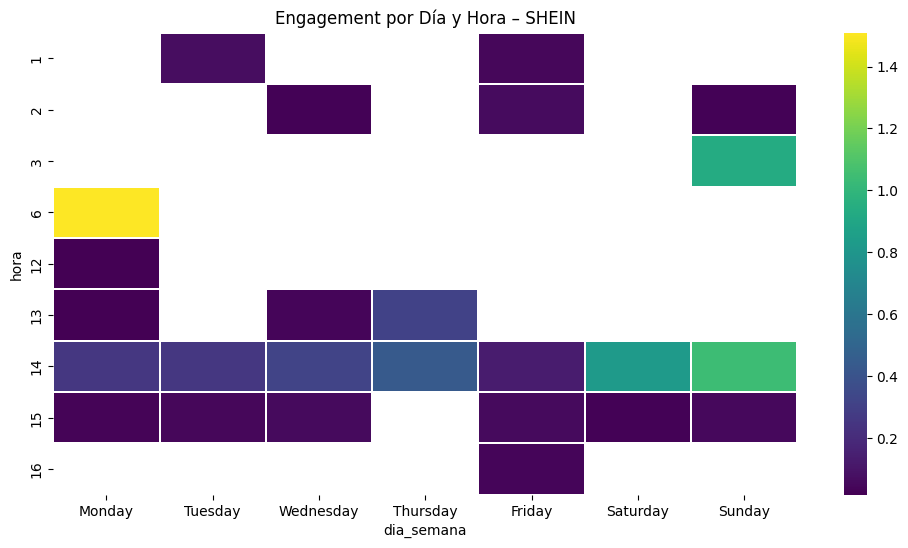

In [89]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_shein, cmap="viridis", linewidths=.3)
plt.title("Engagement por Día y Hora – SHEIN")
plt.show()

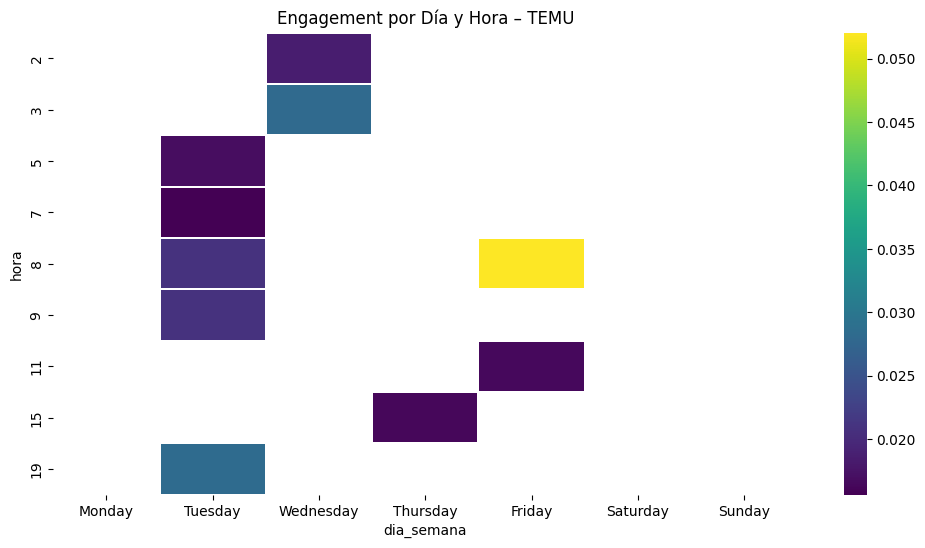

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_temu, cmap="viridis", linewidths=.3)
plt.title("Engagement por Día y Hora – TEMU")
plt.show()

## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección debes **conectar todos tus hallazgos** y responder como si fueras un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

Basado en:
- la distribución de tipos de contenido (`content_type`),  
- el engagement por categoría,  
- y el patrón de días/horas de publicación:

> **Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu.**  
> ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

---

### 7.2. Eficiencia vs volumen

Usando tus resultados de `engagement_rate` y número de posts:

- ¿Quién está “ganando” la batalla por atención eficiente?  
- Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para **una sola** de las dos marcas, ¿a cuál se la das y por qué?

---

### 7.3. Hora de oro

Con base en tu análisis temporal (heatmap):

- ¿Qué día y hora recomendarías como **ventana de oro** para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu?  
- Explica por qué esa ventana maximiza probabilidad de éxito.

---

### 7.4. Greenwashing detector (opcional avanzado)

Filtrando contenido “eco” o “sostenible” (si lo analizaste):

- ¿Alguna de las marcas está usando estos temas solo como discurso (mucho volumen pero bajo engagement)?  
- ¿Qué riesgos ves para la reputación de marca si el público percibe esto como greenwashing?

---

### 7.5. Recomendación ejecutiva (1 párrafo)

Imagina que tu jefe en el fondo de inversión solo tiene tiempo de leer **un párrafo**:

> Escribe un único párrafo donde:  
> - Indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses.  
> - Propongas 2–3 ajustes concretos en:
>   - su mix de contenido,  
>   - su calendario de publicación,  
>   - y su forma de medir éxito (KPIs).


Shein opera con una estrategia de volumen alto y formatos centrados en “hauls” y demostraciones de producto, priorizando alcance masivo sobre eficiencia, lo que explica su engagement más volátil y dependiente de unos pocos picos virales. Temu, en cambio, publica menos pero con mayor consistencia, apoyándose en contenido tipo “meme”, descuentos y UGC que conectan mejor con audiencias que buscan entretenimiento y oportunidades rápidas. Mientras Shein apuesta por saturar múltiples horarios —a veces sin retorno proporcional— Temu concentra sus esfuerzos en ventanas específicas donde su engagement promedio es más alto. En términos estratégicos, Shein gana en visibilidad y presencia, pero Temu destaca en eficiencia y capacidad de activar interacción real por post. Ambas marcas se diferencian claramente en tono, ritmo y profundidad de relación con la audiencia.

Si tuviera que elegir una apuesta clara para los próximos 12 meses, apoyaría a Temu, porque muestra una estrategia más eficiente: menos volumen pero mayor consistencia en engagement real por post. Para potenciar su crecimiento, ajustaría tres frentes clave: (1) Mix de contenido: incrementaría formatos UGC y memes —sus mejores performers— y reduciría piezas de bajo retorno como contenido genérico de producto; (2) Calendario de publicación: ampliaría la presencia en las franjas donde, aunque hoy publica poco, el engagement promedio es alto, reforzando solo los horarios que muestran retorno sostenible; y (3) KPIs: dejaría de perseguir likes brutos y adoptaría métricas de eficiencia como engagement_rate, tiempo de retención y engagement por minuto post-publicación, que capturan mejor la calidad real de la atención y permiten optimizar inversión con mayor precisión.

### Espacio para tus respuestas ejecutivas

Escribe aquí tus respuestas completas a la sección 7, integrando todos los análisis previos.
